In [1]:
import pandas as pd
import numpy as np 
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [30]:
train = pd.read_csv('traindata_rfe.csv')
test = pd.read_csv('testdata_rfe.csv')

/var/folders/ws/d095dcyd45q725d2bmjssqsm0000gn/T/ipykernel_44044/153490653.py:1: DtypeWarning: Columns (32,33) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('traindata_rfe.csv')


In [31]:
X_train = train.drop(['transcript_id','gene_id','label'], axis=1)
y_train = train['label']
X_test = test.drop(['transcript_id','gene_id','label'], axis=1)
y_test = test['label']

In [32]:
y_train.value_counts()

label
0    93715
1    93715
Name: count, dtype: int64

In [33]:
y_test.value_counts()

label
0    22648
1     1184
Name: count, dtype: int64

In [34]:
X_train.head()

,transcript_position,avg_1-flank_length,avg_1-flank_std,avg_1-flank_mean,avg_central_length,avg_central_std,avg_central_mean,avg_1+flank_length,avg_1+flank_std,avg_1+flank_mean,...,std_1-flank_mean,std_central_length,std_central_std,std_central_mean,std_1+flank_length,std_1+flank_std,std_1+flank_mean,seq_left,seq_center,seq_right
0,244,0.008264,4.223784,123.702703,0.009373,7.382162,125.913514,0.007345,4.386989,80.570270,...,4.944365,0.005364,3.302671,2.765244,0.004566,2.906225,2.522168,1,4,16
1,261,0.006609,3.216424,109.681395,0.006813,3.226535,107.889535,0.007710,3.016599,94.290698,...,2.981182,0.003767,1.237045,3.526528,0.004528,1.466295,2.492530,6,2,10
2,316,0.007570,2.940541,105.475676,0.007416,3.642703,98.947027,0.007555,2.087146,89.364324,...,1.492577,0.005035,0.893481,3.203816,0.004497,0.800496,1.484341,12,0,2
3,332,0.010620,6.476350,129.355000,0.008632,2.899200,97.836500,0.006102,2.236520,89.154000,...,3.202963,0.004612,1.393868,1.928009,0.003595,0.741771,3.494937,2,6,3
4,368,0.010701,6.415051,117.924242,0.011479,5.870303,121.954545,0.010019,4.260253,85.178788,...,2.664643,0.005407,1.753894,2.177236,0.005908,1.341822,2.379045,3,9,12


In [35]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
d = scaler.fit_transform(X_train)
normalised_X_train = pd.DataFrame(d, columns=X_train.columns)
normalised_X_train.head()


,transcript_position,avg_1-flank_length,avg_1-flank_std,avg_1-flank_mean,avg_central_length,avg_central_std,avg_central_mean,avg_1+flank_length,avg_1+flank_std,avg_1+flank_mean,...,std_1-flank_mean,std_central_length,std_central_std,std_central_mean,std_1+flank_length,std_1+flank_std,std_1+flank_mean,seq_left,seq_center,seq_right
0,0.012869,0.320301,0.278362,0.774965,0.313303,0.555867,0.774042,0.297366,0.287885,0.248611,...,0.280016,0.218508,0.101848,0.226398,0.243233,0.090561,0.146461,0.043478,0.235294,0.695652
1,0.013777,0.206243,0.180401,0.524207,0.169286,0.167033,0.410623,0.325895,0.157972,0.657667,...,0.152029,0.135480,0.033255,0.310842,0.240713,0.042812,0.144293,0.260870,0.117647,0.434783
2,0.016714,0.272450,0.153573,0.448991,0.203182,0.205973,0.230314,0.313785,0.069860,0.510794,...,0.054982,0.201397,0.021846,0.275046,0.238664,0.020733,0.070529,0.521739,0.000000,0.086957
3,0.017568,0.482647,0.497412,0.876051,0.271625,0.136405,0.207922,0.200279,0.084021,0.504523,...,0.166488,0.179395,0.038463,0.133529,0.178831,0.018786,0.217634,0.086957,0.352941,0.130435
4,0.019491,0.488177,0.491451,0.671622,0.431763,0.414405,0.694217,0.506161,0.275871,0.386008,...,0.131393,0.220712,0.050418,0.161175,0.332299,0.038684,0.135990,0.130435,0.529412,0.521739


In [36]:
normalised_X_train.describe()

,transcript_position,avg_1-flank_length,avg_1-flank_std,avg_1-flank_mean,avg_central_length,avg_central_std,avg_central_mean,avg_1+flank_length,avg_1+flank_std,avg_1+flank_mean,...,std_1-flank_mean,std_central_length,std_central_std,std_central_mean,std_1+flank_length,std_1+flank_std,std_1+flank_mean,seq_left,seq_center,seq_right
count,187430.000000,187430.000000,187430.000000,187430.000000,187430.000000,187430.000000,187430.000000,187430.000000,187430.000000,187430.000000,...,187430.000000,187430.000000,187430.000000,187430.000000,187430.000000,187430.000000,187430.000000,187430.000000,187430.000000,187430.000000
mean,0.085326,0.321560,0.305646,0.593138,0.246807,0.343098,0.508746,0.283526,0.153884,0.427246,...,0.174293,0.196199,0.057900,0.295836,0.209959,0.037394,0.147897,0.486244,0.497152,0.596129
std,0.072669,0.117427,0.178830,0.175636,0.088085,0.173795,0.228014,0.093464,0.075261,0.142060,...,0.084336,0.070160,0.027628,0.103625,0.071329,0.021319,0.050102,0.310957,0.266115,0.294865
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.039195,0.235172,0.170030,0.482285,0.181661,0.195874,0.261444,0.218745,0.097108,0.311248,...,0.115615,0.146038,0.035972,0.219983,0.161228,0.020561,0.112586,0.173913,0.294118,0.391304
50%,0.068991,0.303262,0.257383,0.646760,0.237215,0.331118,0.594816,0.269775,0.145341,0.449975,...,0.157557,0.189555,0.060906,0.292615,0.200917,0.035712,0.143646,0.521739,0.529412,0.608696
75%,0.108453,0.391753,0.423866,0.699430,0.299876,0.464322,0.681673,0.333126,0.197153,0.535973,...,0.218081,0.237712,0.076678,0.366702,0.247807,0.049737,0.178109,0.739130,0.647059,0.869565
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [37]:
d = scaler.fit_transform(X_test)
normalised_X_test = pd.DataFrame(d, columns=X_test.columns)
normalised_X_test.head()

,transcript_position,avg_1-flank_length,avg_1-flank_std,avg_1-flank_mean,avg_central_length,avg_central_std,avg_central_mean,avg_1+flank_length,avg_1+flank_std,avg_1+flank_mean,...,std_1-flank_mean,std_central_length,std_central_std,std_central_mean,std_1+flank_length,std_1+flank_std,std_1+flank_mean,seq_left,seq_center,seq_right
0,0.054772,0.330418,0.374506,0.562536,0.451043,0.755932,0.689752,0.687408,0.111903,0.585046,...,0.254995,0.323343,0.077564,0.365202,0.769621,0.032594,0.026947,0.478261,1.000000,0.913043
1,0.058768,0.567866,0.499809,0.664438,0.494603,0.339463,0.791245,0.219113,0.128262,0.654885,...,0.142416,0.459586,0.062153,0.252199,0.261166,0.044891,0.043219,0.130435,0.647059,0.869565
2,0.061236,0.284136,0.337934,0.519312,0.424500,0.466924,0.778200,0.339765,0.168967,0.307752,...,0.219995,0.232259,0.096518,0.290691,0.333384,0.052945,0.067706,0.304348,0.176471,0.608696
3,0.070052,0.471025,0.609639,0.643197,0.346470,0.510971,0.721716,0.654446,0.187557,0.591068,...,0.161922,0.224677,0.131265,0.392006,0.463346,0.053597,0.064235,0.130435,0.647059,0.869565
4,0.081335,0.185601,0.286274,0.551340,0.254796,0.587059,0.708707,0.321552,0.173422,0.483505,...,0.233199,0.201784,0.114632,0.424743,0.386162,0.056727,0.021868,0.478261,1.000000,1.000000


In [38]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(normalised_X_train, y_train)


RandomForestClassifier(random_state=42)

In [39]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on the testing set
y_pred = rf_model.predict(normalised_X_test)

# Print classification report for detailed metrics
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.96      0.99      0.98     22648
           1       0.64      0.28      0.39      1184

    accuracy                           0.96     23832
   macro avg       0.80      0.63      0.68     23832
weighted avg       0.95      0.96      0.95     23832



### Innovation: Bayesian Optimisation with Hyperopt
source: https://www.kaggle.com/code/prashant111/a-guide-on-xgboost-hyperparameters-tuning

In [24]:
# version 6: reg:logistic 
best_model = xgb.XGBClassifier(colsample_bytree = 0.7445107941187324, gamma= 7.422940033575507, max_depth= 8, 
min_child_weight = 5, reg_alpha = 137, reg_lambda = 0.63311680578766,n_estimators=180, objective='reg:logistic')
best_model.fit(normalised_X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7445107941187324, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=7.422940033575507,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=180, n_jobs=None,
              num_parallel_tree=None, objective='reg:logistic', ...)

In [25]:
y_pred = best_model.predict(normalised_X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.89      0.93     22648
           1       0.24      0.66      0.35      1184

    accuracy                           0.88     23832
   macro avg       0.61      0.77      0.64     23832
weighted avg       0.94      0.88      0.90     23832



In [17]:
n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [18]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [19]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

In [20]:
rf_random.fit(normalised_X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=5; total time=  18.4s
[CV] END bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=5; total time=  18.9s
[CV] END bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=5; total time=  19.1s
[CV] END bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=5; total time=  15.1s
[CV] END bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=5; total time=  15.5s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=20; total time=  38.9s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=20; total tim

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
235 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
161 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=35, verbose=2)

In [21]:
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Best Parameters:  {'n_estimators': 50, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 100, 'bootstrap': False}  



In [22]:
randmf = RandomForestRegressor(n_estimators = 50, min_samples_split = 6, min_samples_leaf= 1, max_features = 'sqrt', max_depth= 100, bootstrap=False) 
randmf.fit( normalised_X_train, y_train) 

RandomForestRegressor(bootstrap=False, max_depth=100, max_features='sqrt',
                      min_samples_split=6, n_estimators=50)

In [24]:
y_pred = randmf.predict(normalised_X_test)

In [26]:
y_pred_class = (y_pred > 0.5).astype(int)

In [27]:
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     22648
           1       0.53      0.14      0.22      1184

    accuracy                           0.95     23832
   macro avg       0.74      0.57      0.60     23832
weighted avg       0.94      0.95      0.94     23832



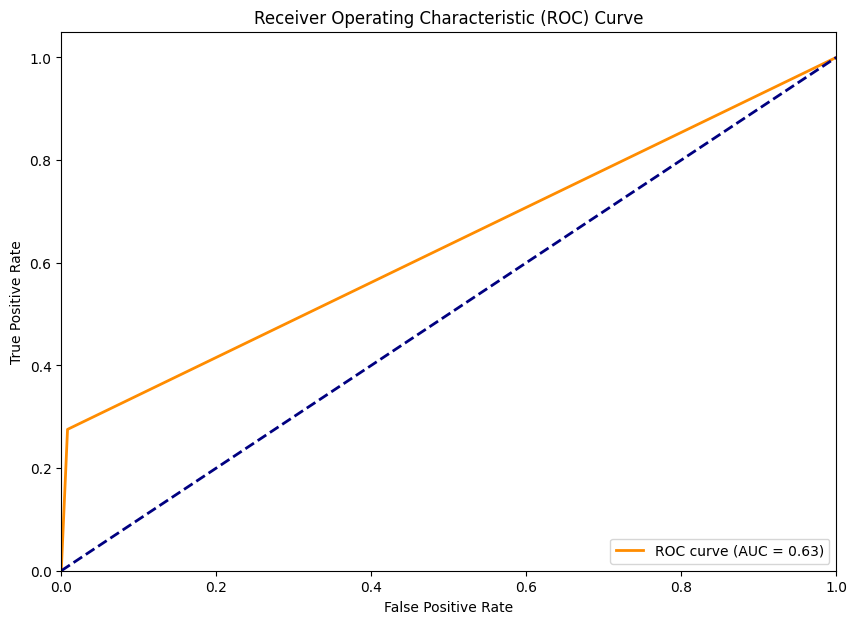

In [40]:
# ROC AUC 
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

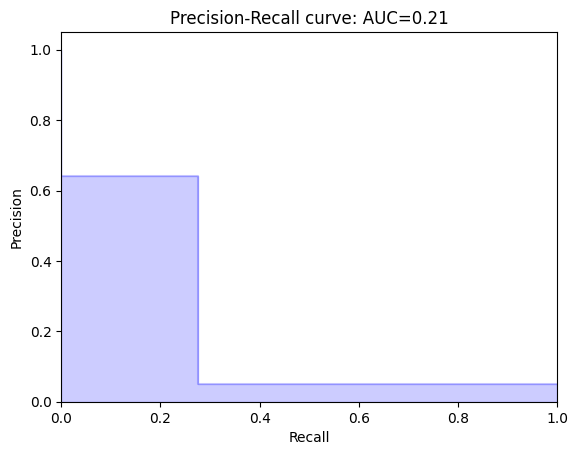

In [41]:
# Get predicted probabilities for the positive class (class 1)
from sklearn.metrics import average_precision_score, precision_recall_curve
# Calculate PR AUC
pr_auc = average_precision_score(y_test, y_pred)

# Plot Precision-Recall curve (optional)
precision, recall, _ = precision_recall_curve(y_test, y_pred)

plt.figure()
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: AUC={0:0.2f}'.format(pr_auc))
plt.show()


In [26]:
# output probabiliy 
prob = best_model.predict_proba(normalised_X_test)[:,1]
transcript_id = test['transcript_id']
transcript_position = test['transcript_position']
data = {
    'transcript_id': transcript_id,
    'transcript_position': transcript_position,
    'probability': prob
}

# Create a DataFrame from the data dictionary
output = pd.DataFrame(data)

output.head()



,transcript_id,transcript_position,probability
0,ENST00000005257,470,0.139828
1,ENST00000005257,504,0.278687
2,ENST00000005257,525,0.031150
3,ENST00000005257,600,0.519034
4,ENST00000005257,696,0.161121


In [27]:
test.head()

,transcript_id,transcript_position,gene_id,avg_central_mean,avg_1+flank_std,med_central_std,med_central_mean,med_1+flank_std,std_1-flank_std,std_1-flank_mean,std_central_std,std_central_mean,std_1+flank_std,std_1+flank_mean,label,seq_left,seq_center,seq_right
0,ENST00000005257,470,ENSG00000006451,121.032258,2.513839,9.26,121.0,2.390,3.070013,4.203054,1.736880,3.126204,0.869722,1.267762,0,11,17,21
1,ENST00000005257,504,ENSG00000006451,126.029412,2.674206,4.92,126.0,2.315,1.562898,2.673237,1.436917,2.345023,1.113461,1.576460,0,3,11,20
2,ENST00000005257,525,ENSG00000006451,125.387097,3.073226,6.15,126.0,2.880,1.130465,3.727447,2.105785,2.611110,1.273123,2.040985,0,7,3,14
3,ENST00000005257,600,ENSG00000006451,122.606061,3.255455,5.94,122.0,3.030,2.399447,2.938300,2.782057,3.311499,1.286042,1.975153,0,3,11,20
4,ENST00000005257,696,ENSG00000006451,121.965517,3.116897,7.81,122.0,2.820,1.898227,3.906871,2.458343,3.537803,1.348092,1.171399,0,11,17,23


In [28]:
import joblib
joblib.dump(best_model, 'bext_xgboost.pkl')

['bext_xgboost.pkl']